# 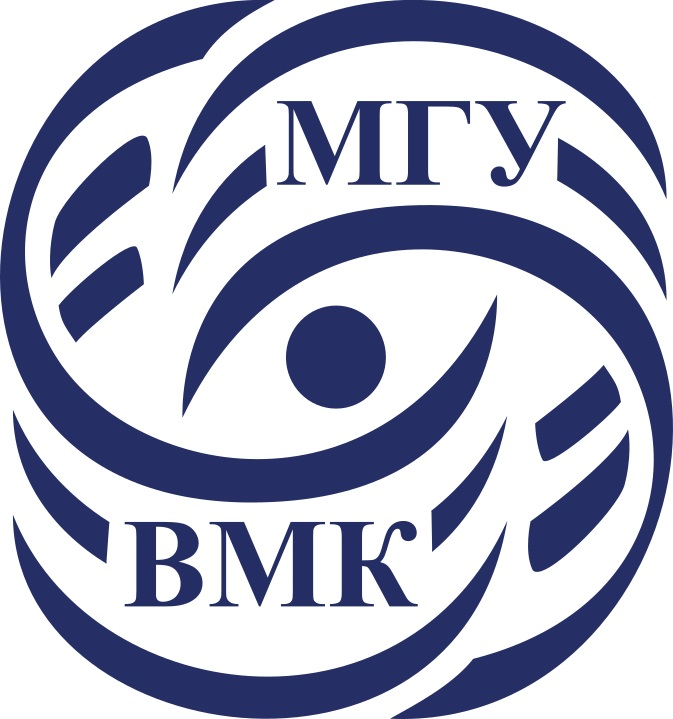

# Машинное обучение. ВМК МГУ

# Практическое задание 6: Ансамбли
## Уровень: <font color='MediumSeaGreen'>**Исследовательский (Research)**</font>

# О формате сдачи

🔷 **<font color='plum'>При решении ноутбука используйте данный шаблон</font>**

    ✅ Можно добавлять новые ячейки любых типов
    ❌ Не нужно удалять текстовые ячейки c разметкой частей ноутбука и формулировками заданий


🔷 **<font color='plum'>При оценивании задач учитывается код</font>**

    ✅ Задания, в которых необходим код, обычно помечаются фразами "Your code here"/"Ваш код" и аналогичными
    ❌ Ответы на вопросы без сопутствующего кода оцениваются в 0 баллов
    ❌ Наличе работоспособного кода в ноутбуке, если на сказано иного, обязательно

🔷 **<font color='plum'>При оценивании задач учитываются выводы</font>**

    ✅ Задания, в которых необходимы выводы, обычно помечаются фразами Вывод"/"Ответ на вопрос"/"Ваш текст" и аналогичными
    ✅ Обычно выводы подразумевают под собой текстовый ответ (можно писать markdown, latex).
    ✅ Сопутствующие изображения, графики, таблички - приветствуются!
    ❌ При отсутствии выводов задание не засчитается на полный балл

__В этом задании вы:__

- Исследуете различные методы ансамблирования разных алгоритмов
- Поработаете с одним из самых мощных алгоритмов машинного обучения - Random Forest (случайными лесами)
- Порешаете интересную физическую задачку :)

-------
<font color="white" style="opacity:0.2024"></font>
<font color=DarkOrange>**Примерное время выполнения (execution time/время выполнения, если нажать run all) всех ячеек ноутбука при правильной реализации: до 10 минут </font>**

# Подготовка рабочей среды

Сначала установим нужные нам версии библиотек. Мы гарантируем, что в данных версиях задание будет корректно отрабатывать.

После установки нужных версий, **возможно,** нужно перезагрузить среду (runtime), но скорее всего вам это не понадобится


На скачивание файла и установку понадобится не более 5 минут.

<font color='OrangeRed'>**Важно!**</font>

Устанавливать нужные версии нужно каждый раз, когда создается новый рантайм. Например, если вы 2 часа подряд делаете это задание, то подготовить библиотеки достаточно 1 раз. Но если вы, например, начали в понедельник, затем закрыли/выключили ноутбук, то при продолжении в среду, вам нужно будет запустить рантайм заново и следовательно заново установить библиотеки.

<font color='OrangeRed'>**Важно!**</font>
Если вы предпочитаете делать практические задания на своем личном ноутбуке, то проверьте, что вы установили рабочее окружение в [соответствии с гайдом](https://github.com/MSU-ML-COURSE/ML-COURSE-24-25/blob/main/tutorials/%D0%A2%D1%83%D1%82%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%20%D0%BF%D0%BE%20%D1%83%D1%81%D1%82%D0%B0%D0%BD%D0%BE%D0%B2%D0%BA%D0%B5%20%D1%80%D0%B0%D0%B1%D0%BE%D1%87%D0%B5%D0%B3%D0%BE%20%D0%BE%D0%BA%D1%80%D1%83%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B2%20Python%20%D0%B4%D0%BB%D1%8F%20%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%20(2).pdf)


In [ ]:
# !!! Данный блок будет работать только в Google-Colab !!!
! gdown 10k8Hwn9kpK9SpK4IEj4-EaWQZqgYT5-Q
! pip install -r /content/requirements_2024_25_for_colab_small.txt

Проверим версию библиотеки:

In [ ]:
import catboost
assert(catboost.__version__ == '1.2.7')

Теперь можно приступать к выполнению задания! :)

-----------
<font color="white" style="opacity:0.2023"></font>

Привет, ребятушки!

Сегодняшний ноутбук посвящен методам ансамблирования.

<font color='CornflowerBlue'>**Ансамбли**</font> - это техника, при которой несколько моделей объединяются для получения более точных результатов. Основная идея заключается в том, что объединение нескольких "плохих" моделей может привести к получению одной, но очень хорошей модели, ведь [соответствующая теорема](https://en.wikipedia.org/wiki/Condorcet%27s_jury_theorem) обещает нам, что это возможно.
Существует несколько популярных подходов к ансамблированию. С базовыми методами мы познакомимся в данном ноутбуке. А основному методу ансамблирования, градиентному бустингу, будет посвящено отдельное задание!

**<font color='red'>Внимание!</font> При решении задач разрешается использовать ``n_jobs`` для ускорения обучения.**

Импортируем необходимые библиотеки:

In [1]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, StackingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt

#####
# если Вы не различаете предлагаемые цвета, то Вы можете раскомментить строку ниже
# для применения специальной цветовой палитры или аналогичных
# plt.style.use('tableau-colorblind10')
#####

import numpy as np

import time
import os

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Напишем функцию для генерации датасета и оценки модели. Для экспериментов возьмем классический датасет по классификации рукописных цифр. Чтобы сделать задачу более интересной поместим в обучающее множество всего 10% от всего датасета.

In [3]:
def get_dataset():
    """Return the splits of the dataset for training and testing"""
    X, y = load_digits(return_X_y=True)
    return train_test_split(X, y, random_state=42, train_size=0.1)

X_train, X_test, y_train, y_test = get_dataset()

def evaluate_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return acc

# Комитет большинства

Начнем знакомство с ансамблями с самого простого подхода - комитета большинства.

<font color='CornflowerBlue'>**Комитет большинства**</font> — это метод ансамблевого обучения, который объединяет предсказания нескольких базовых моделей для улучшения общей производительности. Он работает по принципу голосования: каждая из базовых моделей (например, деревья решений, логистическая регрессия и т.д.) делает свои предсказания, а комитет большинства агрегирует эти результаты.

Существует два основных типа голосования:

1. "hard voting" (жесткое голосование), где итоговый класс выбирается на основе большинства голосов,
2. "soft voting" (мягкое голосование), где учитываются вероятности предсказаний моделей, и класс с наивысшей средней вероятностью становится итоговым предсказанием.

Такой подход позволяет снизить вероятность ошибок, поскольку объединение различных моделей может компенсировать слабости каждой из них, что в конечном итоге приводит к более надежным и точным предсказаниям.

## <font color='DarkOrange'>**Задание 1 [0.5 балла]**</font>

**Цели**: В данном задании следует выполнить следующие пункты:

1. Создать отдельный ``LogisticRegression`` и оценить его точность с помощью функции ``evaluate_model``, определенного выше.
2. Обучить модель `VotingClassifier` со следующими алгоритмами: `LogisticRegression`, `KNeighborsClassifier` и `DecisionTreeClassifier` в двух режимах:

* hard voting
* soft voting

4. Сравните качество на тесте всех трех классификаторов. Сделайте вывод о пользе комитета большинства.

<font color='OrangeRed'>**Примечание**</font> - везде берите дефолтные параметры классов, кроме явно обозначенных для перебора

In [4]:
lg = LogisticRegression()

ens_hard = VotingClassifier([
    ('lg', LogisticRegression()),
    ('knn', KNeighborsClassifier()),
    ('tree', DecisionTreeClassifier())
], voting='hard')

ens_soft = VotingClassifier([
    ('lg', LogisticRegression()),
    ('knn', KNeighborsClassifier()),
    ('tree', DecisionTreeClassifier())
], voting='soft')

print("LogReg accuracy:", evaluate_model(lg))
print("Hard voting accuracy:", evaluate_model(ens_hard))
print("Soft voting accuracy:", evaluate_model(ens_soft))

LogReg accuracy: 0.9165636588380717
Hard voting accuracy: 0.9066749072929543
Soft voting accuracy: 0.9134734239802225


<font color='MediumOrchid'>**Ответ:**</font> как можно увидеть, совмещение базовых классификаторов при помощи голосования не дало прироста. Произошло переобучение агрегирующей модели, так как все базовые модели обучались на одной и той же выборке.

# Бэггинг



<font color='CornflowerBlue'>**Бэггинг**</font> (bagging, или bootstrap aggregating) - это такой приём в машинном обучении, когда берется куча одинаковых моделей, где каждая модель обучалась на случайном подмножестве нашего датасета. В итоге, хоть каждая модель может ошибаться по-своему,  в среднем ошибки компенсируются, и итоговая предсказательная способность получается лучше, чем у каждой модели по отдельности.


## <font color='DarkOrange'>**Задание 2.1 [0.25 балла]**</font>

Верно ли, что random forest является чисто бэггингоим над деревьями решений? Или нет? Обоснуйте свой выбор

<font color='MediumOrchid'>**Ответ:**</font> нет, не является, поскольку каждое дерево из случайного леса строится на случайном подмножестве признаков, что помогает разнообразить деревья и спастись от переобучения.


## <font color='DarkOrange'>**Задание 2.2 [0.5 балла]**</font>
**Цели**: В данном задании следует выполнить следующие пункты:

1. Создать отдельный ``DecisionTreeClassifier`` и оценить его точность с помощью функции ``evaluate_model``, определенного выше.
2. Взять класс ``BaggingClassifier``, являющийся стандартным методом `sklearn`, и создать два классификатора:

* один с использованием ``DecisionTreeClassifier`` в качестве базового метода,

* второй с использованием ``LogisticRegression``. В обоих случаях бэггинг должен содержать по 10 моделей. Оцените качество обеих моделей.
3. Возьмите стандартный классификатор ``RandomForestClassifier`` и оцените его качество.
4. Сравните качество всех четырех классификаторов. Сделайте вывод о пользе бэггинга.

<font color='OrangeRed'>**Примечание**</font> - везде берите дефолтные параметры классов

In [5]:
tree = DecisionTreeClassifier()
bag_tree = BaggingClassifier(DecisionTreeClassifier())
bag_lg = BaggingClassifier(LogisticRegression())
forest = RandomForestClassifier()

print("Decision tree accuracy:", evaluate_model(tree))
print("Bagging of trees accuracy:", evaluate_model(bag_tree))
print("Bagging of LogReg accuracy:", evaluate_model(bag_lg))
print("Random forest accuracy:", evaluate_model(forest))

Decision tree accuracy: 0.6699629171817059
Bagging of trees accuracy: 0.7731767614338689
Bagging of LogReg accuracy: 0.915327564894932
Random forest accuracy: 0.907292954264524


<font color='MediumOrchid'>**Ответ.**</font> Можно отметить следующее:
* бэггинг над случайными деревьями дал значительный прирост по сравнению с одним решающим деревом, что неудивительно, поскольку множество базовых моделей, построенных на различных подмножествах тренировочной выборки, успешно скорректировали неточности друг друга;
* случайный лес, в свою очередь, показал себя намного лучше, чем бэггинг над деревьями, поскольку деревья в лесу строились по случайным подмножеством признаков, что еще больше разнообразило базовые модели и избавило итоговую модель от переобучения;
* что примечательно, бэггинг над логистическими регрессиями показал себя лучше, чем все три модели с деревьями. Вероятно, здесь помогло то, что разделяющая граница в случае ансамбля логрегрессий получилась более гладкой.

## <font color='DarkOrange'>**Задание 2.3 [0.5 балла]**</font>
**Цели**: Сравнение `BaggingClassifier` над деревьями и `RandomForestClassifier` по качеству на тесте в зависимости от числа выбранных базовых алгоритмов.

1. Обучите `BaggingClassifier` над деревьями и `RandomForestClassifier`, перебирая кол-во базовых алгоритмов. Сетка должна содержать хотя бы 10 значений и покрывать диапазон от 1 до 500 деревьев

2. Получите качество на тесте (``evaluate_model``) и отобразите это графически в зависимости от числа базовых алгоритмов для двух типой моделей. Важно это сделать на одном полотне.

3. Сравните полученные графики. Какие выводы можно сделать о каждом алгоритме? Сранвите результаты двух типов моделей друг с другом.

<font color='OrangeRed'>**Примечание**</font> - везде (кроме кол-ва базовых алгоритмов) берите дефолтные параметры классов

In [16]:
from tqdm.auto import tqdm

In [25]:
grid = np.arange(1, 502, 20)
bag_accs, rf_accs = [], []

for n in tqdm(grid):
    bag = BaggingClassifier(DecisionTreeClassifier(), n_estimators=n)
    rf = RandomForestClassifier(n_estimators=n)

    bag_accs.append(evaluate_model(bag))
    rf_accs.append(evaluate_model(rf))

100%|██████████| 26/26 [00:26<00:00,  1.02s/it]


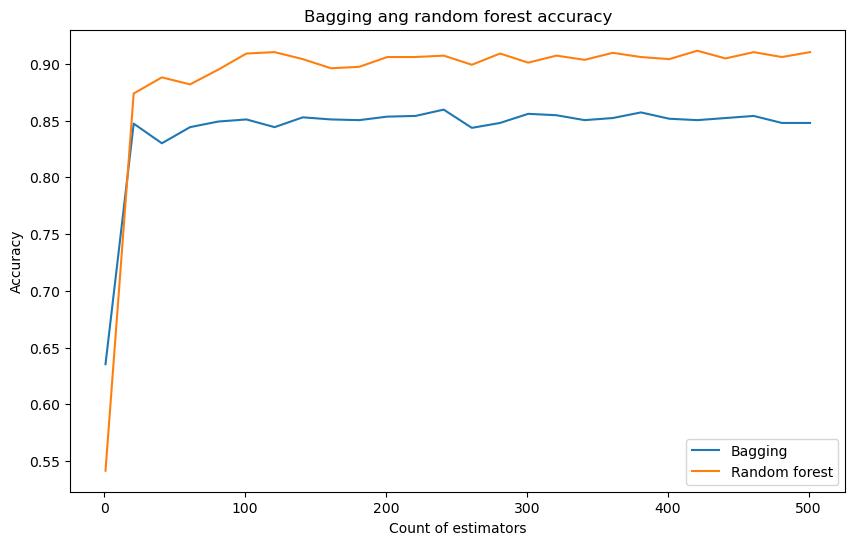

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(grid, bag_accs, label='Bagging')
plt.plot(grid, rf_accs, label='Random forest')

plt.title('Bagging ang random forest accuracy')
plt.xlabel('Count of estimators')
plt.ylabel('Accuracy')

plt.legend()

plt.show()

<font color='MediumOrchid'>**Ответ:**</font> в целом, начиная с 50-100 базовых моделей, качество что у бэггинга, что у леса остается примерно на одном уровне и не улучшается. Это неудивительно, так как на этом количестве базовых моделей становится вполне достаточно, и добавление последующих уже не играет ключевой роли в предсказании. Кроме того, лес, по вышеописанным причинам, показывает себя стабильно лучше, чем бэггинг.

Как вы увидели в прошлом задании, использование случайного леса помогает добиться качества выше, чем при использовании одного отдельного дерева. Но что случится, если значительно увеличить число деревьев в лесу? Приведет ли это к переобучению? Давайте проверим!

# Стэкинг

Следующий метод, с которым мы познакомимся - стэкинг.

<font color='CornflowerBlue'>**Стекинг**</font> — это такая хитрая стратегия ансамблирования, когда мы обучаем несколько различных методов (как глупых, так и умных) и их предсказания подаются как признаки какому-то другому методу, мета-классификатору. Этот мета-классификатор обучается объединять предсказания всех методов и давать что-то более верное. Давайте попробуем применить стэкинг, ведь он уже реализован за нас!  



## <font color='DarkOrange'>**Задание 3.1 [0.25 балла]**</font>

Какая техника позволяет избежать утечки целевой переменной в стекинге? Коротко объясните

<font color='MediumOrchid'>**Ответ:**</font> стекинг с кросс-валидацией, когда базовые модели обучаем на всех фолдах, кроме одного, а затем предсказываем отклики на оставшихся фолдах и на их комбинации обучаем агрегирующую модель.

## <font color='DarkOrange'>**Задание 3.2 [0.5 балла]**</font>
**Цели**: В данном задании следует выполнить следующие пункты:

1. Использовать `StackingClassifier` из `sklearn`, создав ансамбль из двух базовых моделей: `DecisionTreeClassifier` и `LogisticRegression`. В качестве мета-модели используйте `LogisticRegression`. Оцените качество модели.
1. Добавить в стекинг ещё одну модель, например, `RandomForestClassifier`, и снова оценить качество предсказаний.
1. Сравните качество трёх классификаторов (отдельного дерева решений, стекинга из двух моделей и стекинга из трёх моделей). Сделайте вывод о пользе стекинга.

In [32]:
tree = DecisionTreeClassifier()
evaluate_model(tree)

0.6835599505562423

In [40]:
stk = StackingClassifier([
    ('tree', DecisionTreeClassifier()),
    ('lg', LogisticRegression())
], LogisticRegression())
evaluate_model(stk)

0.9110012360939431

In [26]:
stk2 = StackingClassifier([
    ('tree', DecisionTreeClassifier()),
    ('lg', LogisticRegression()),
    ('rf', RandomForestClassifier())
], LogisticRegression())
evaluate_model(stk2)

0.9177997527812114

<font color='MediumOrchid'>Ответ:</font> как видим, стекинг дает колоссальный прирост в точности по сравнению с базовой моделью благодаря использованию настраиваемой агрегирующей модели, которая компенсирует ошибки базовых. Тем не менее, выбор базовых моделей должен быть сделан грамотно, поскольку использование тяжелых/схожих базовых моделей, как легко убедиться, не дает особого прироста итоговой точности.

# Блэндинг

<font color='CornflowerBlue'>**Блендинг**</font> — это метод ансамблирования, похожий на стекинг, но с одной хитростью. В нём используются две группы моделей: базовые модели, которые делают предсказания, и мета-модель, которая учится комбинировать их результаты. Главное отличие от стекинга в том, что базовые модели обучаются на одном наборе данных, а мета-модель — на предсказаниях, сделанных на отдельном валидационном наборе.

Таким образом, для реализации блендинга нужно разбить обучающее множество на две части. На первой части обучить базовые модели, а на второй - получить их предсказания и обучить мета-модель.

## <font color='DarkOrange'>**Задание 4 [1 балл]**</font>
**Цели**: В данном задании следует выполнить следующие пункты:

1. Взять шаблон для `BlendingClassifier`, приведенный ниже, и заполнить все пропущенные участки кода.
1. Воспользоваться любыми базовыми моделями и попробовать получить лучшее качество на диком западе!

In [149]:
import numpy.typing as npt
from typing import List, Tuple
from sklearn.base import BaseEstimator, ClassifierMixin


class BlendingClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, base_models: List[ClassifierMixin], meta_model: ClassifierMixin,
                 valid_size: float = 0.2, random_state: int = 42) -> None:
        """
        :param base_models: список базовых моделей (не обученных)
        :param meta_model: мета-модель (не обученная)
        :param valid_size: доля данных для валидации (по умолчанию 20%)
        :param random_state: фиксированный seed для воспроизводимости
        """
        self.base_models: List[ClassifierMixin] = base_models
        self.meta_model: ClassifierMixin = meta_model
        self.valid_size: float = valid_size
        self.random_state: int = random_state
        self.fitted_base_models: List[ClassifierMixin] = []

    def _split_train_valid(self, X: npt.NDArray[np.float64],
                           y: npt.NDArray[np.int_]) -> Tuple[npt.NDArray[np.float64],
                                                              npt.NDArray[np.float64],
                                                              npt.NDArray[np.int_],
                                                              npt.NDArray[np.int_]]:
        """Разделяет данные на обучающую и валидационную выборки."""
        return train_test_split(X, y, test_size=self.valid_size, random_state=self.random_state)

    def _train_base_models(self, X_train: npt.NDArray[np.float64],
                           y_train: npt.NDArray[np.int_]) -> None:
        """Обучает базовые модели на обучающей выборке."""
        self.fitted_base_models = []
        for model in self.base_models:
            model.fit(X_train, y_train)
            self.fitted_base_models.append(model)

    def _generate_meta_features(self, X_valid: npt.NDArray[np.float64]) -> npt.NDArray[np.float64]:
        """Создаёт новые фичи для мета-модели — предсказания базовых моделей."""
        meta_features = npt.NDArray[np.float64](shape=(X_valid.shape[0], 0))
        for model in self.fitted_base_models:
            y_pred = model.predict(X_valid)
            meta_features = np.hstack([meta_features, y_pred[:, None]])
        return meta_features 

    def fit(self, X: npt.NDArray[np.float64], y: npt.NDArray[np.int_]) -> "BlendingClassifier":
        """Обучает базовые модели и затем мета-модель."""
        X_train, X_valid, y_train, y_valid = self._split_train_valid(X, y)

        # Обучение базовых моделей
        self._train_base_models(X_train, y_train)

        # Генерация мета-признаков
        meta_features = self._generate_meta_features(X_valid)

        # Обучение мета-модели
        self.meta_model.fit(meta_features, y_valid)

    def predict(self, X: npt.NDArray[np.float64]) -> npt.NDArray[np.int_]:
        """Предсказывает класс на основе предсказаний базовых моделей."""
        base_pred = npt.NDArray[np.float64](shape=(X.shape[0], 0))
        for model in self.fitted_base_models:
            y_pred = model.predict(X)
            base_pred = np.hstack([base_pred, y_pred[:, None]])
        return self.meta_model.predict(base_pred)

classifier = BlendingClassifier([RandomForestClassifier() for _ in range(10)], RandomForestClassifier())
evaluate_model(classifier)

0.9171817058096415

# ML-задача

С этого момента мы изменим датасет и попытаемся поиграться с физикой: возьмем коллекцию различных потенциалов и для них будем предсказывать некоторую физическую величину. Обученные физики говорят, что эта величина зависит от формы и глубины потенциала, а значит и мы можем тут чему-то научиться. Ранее эту задачу пытались решить с помощью сверточных нейронных сетей. А получится ли это у нас с помощью деревьев?

Загрузим датасет и посмотрим как он выглядит:

**<font color='OrangeRed'>Внимание!</font>** Для выполнения этого задания вам понадобится публичный датасет из соответствующего ML-задания на cv-gml.ru.

Если вы выполняете задание в <font color='OrangeRed'>Google Colab</font>, то можете пропустить дальнейший текст - данные скачаются в следующей ячейке кода.

Если вы делаете <font color='OrangeRed'>локально</font>, то, пожалуйста, выполните эти пункты:

1. Скачайте архив `Шаблон решения` из ML-задания и разархивируйте его в любом удобном для вас месте.
2. Найдите переменную `path_to_dataset`, расположенную на первой строке ячейки после загрузки данных, и измените её значение на полный путь до папки `[ПАПКА_ИЗВЛЕЧЕНИЯ]/public_tests/01_test_potentials_input/train/potentials`


In [152]:
!gdown 1l7bH623Jmdj-3pKSwhBgxlhkyZJ8xyCv


Downloading...
From (original): https://drive.google.com/uc?id=1l7bH623Jmdj-3pKSwhBgxlhkyZJ8xyCv
From (redirected): https://drive.google.com/uc?id=1l7bH623Jmdj-3pKSwhBgxlhkyZJ8xyCv&confirm=t&uuid=d492205f-07a3-4abc-8199-50030881a7ce
To: /media/midas/hardmachine/Files/msu/mlcmcmsu24/research/06_ensembles/trees_public_tests.zip
100%|██████████████████████████████████████| 27.8M/27.8M [00:03<00:00, 8.41MB/s]


**<font color='OrangeRed'>Внимание!</font> Если Вы выполняете данное задание в google colab и предыдущий код выполнился с ошибкой (файл не скачался), то Вам нужно будет скачать его вручную**.

Для этого:

1. Перейдите по ссылке, указанной этом в сообщении об ошибке.
1. Скачайте файл вручную на локальный компьютер.
1. Нажмите на иконку папки в левой верхней части данного окна.
1. Вручную загрузите файл в корневую директорию (перетащив файл или нажав ПКМ -> загрузить).

In [ ]:
!unzip -d ./public_tests -u /content/trees_public_tests.zip

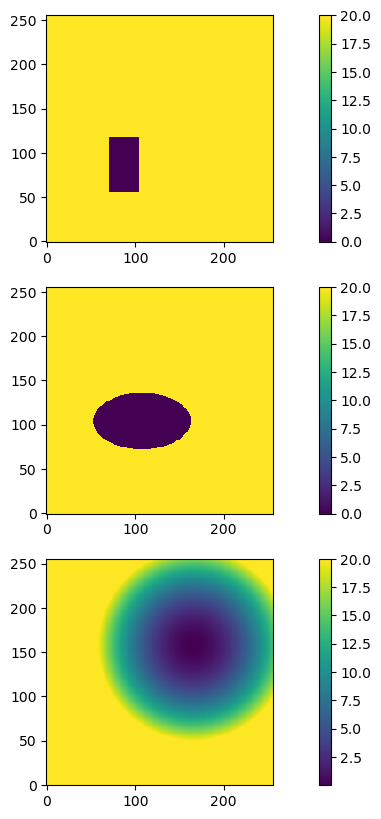

In [2]:
path_to_dataset = "./public_tests/01_test_potentials_input/train/potentials"

chosen_ones = {'b2399918793e4228a3ea0a0a89adf11b.npz', '513d5523d14c47feb8b544138071c496.npz', 'ca9f96c404b740e3b28f583f9d9afbf8.npz'}

plt.figure(figsize=(12, 10))

def get_potential_dataset():

    global path_to_dataset

    """Return the training and testing splits of the potential dataset"""
    X, y = [], []

    plot_index = 1

    if not path_to_dataset.endswith("/"):
        path_to_dataset += "/"

    for f in os.listdir(path_to_dataset):

        npz = np.load(f'{path_to_dataset}{f}')
        data, target = npz['data'], npz['target']

        X.append(data)
        y.append(target)

        if f in chosen_ones:
            plt.subplot(len(chosen_ones), 1, plot_index)
            plt.imshow(data, origin="lower", interpolation='none')
            plt.colorbar()
            plot_index += 1
    plt.show()
    return train_test_split(np.array(X), np.array(y), random_state=42)

X_train, X_test, y_train, y_test = get_potential_dataset()



Можно увидеть, что у нас имеется три типа потенциалов: два с бесконечно крутыми стенками: квадратный и эллиптический (их значение резко меняется на 0). Также у нас имеется гармонический потенциал (красивый и круглый, он плавно спускается к своему минимуму). В местах, где потенциала нет, значение матрицы равно 20.

В глаза бросается одна проблема: матрицы у нас квадратные (каждая картинка `256 х 256`), а большинство методов машинного обучения работает с векторами-признаками. К сожалению, нам придется с этим позже разобраться. Но есть еще более крупная проблема: потенциалы находятся в "случайных" местах рисунка, и оставлять это без внимания нельзя. Но вернёмся к нашим баранам. У линейных регрессоров есть одно очень полезное свойство: после обучения мы ``из коробки`` получаем важность признаков: чем выше значение коэффициента (или абсолютное значение) стоящего у признака, тем этот признак важнее. Деревья решений не обладают столь же ``естественной`` оценкой важности признаков, однако мы всё равно можем её получить. Называется эта оценка критерием Джини: она вычисляет то, как начинают ``ошибаться`` предсказания регрессора, если исключить данный признак. Чем сильнее ошибка, тем важнее признак. К нашей радости, sklearn так же ``из коробки`` включает данные оценки признаков. Давайте попробуем воспользоваться этой функцией и посмотреть на важность признаков.

План наших действий следующий. Во-первых, мы должны преобразовать квадратные матрицы в векторы. Для простоты воспользуемся обычным reshape, что сможет гарантировать нам устойчивость преобразования. Получив вектор, мы воспользуемся методами машинного обучения и получим вектор, характеризующий важность каждого признака. Далее, с целью визуализации этого вектора важностей и возможности его сопоставления с оригинальными изображениями, воспользуемся обратным reshape в исходную размерность. Reshape работает таким образом, что если мы сделаем всё верно, то важности признаков попадут в те же пиксели, которым они соответствуют в исходных изображениях. Давайте попробуем это!

## <font color='DarkOrange'>**Задание 5 [2 балла]**</font>
**Данные**: потенциалы  
**Метрика качества**: MAE  
**Цели**: В данном задании следует выполнить следующие пункты:  
1. Воспользоваться классом `PotentialTransformer` для преобразования двумерной матрицы в одномерный вектор
2. Воспользоваться классом `Pipeline`, чтобы "объединить" трансформатор и обучаемый метод
3. Обучить `LinearSVR` из `sklearn` на этом датасете.
4. Обучить `RandomForestRegressor` из `sklearn` на этом датасете.
5. Извлеките важность признаков из обученного леса с помощью `feature_importances_`. Извлеките также коэффициенты svm через `coef_` (брать абсолютные значения необязательно).
6. Преобразуйте одномерный вектор важностей признаков в двумерную картинку таким образом, чтобы их можно было сравнивать с исходными потенциалами. Постройте рисунки важностей признаков с помощью plt.imshow. Добавьте легенду.
7. Оцените качество предсказаний через метод .predict.
8. Проанализируйте результаты. Можно ли сказать что у обоих методов получились одинаковые важности признаков? Можно ли сказать, что важность признаков отображает структуру потенциалов?

In [11]:
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [4]:
class PotentialTransformer:
    """
    A potential transformer.

    This class is used to convert the potential's 2d matrix to 1d vector of features.
    """

    def fit(self, x, y):
        """
        Build the transformer on the training set.
        :param x: list of potential's 2d matrices
        :param y: target values (can be ignored)
        :return: trained transformer
        """
        return self

    def fit_transform(self, x, y):
        """
        Build the transformer on the training set and return the transformed dataset (1d vectors).
        :param x: list of potential's 2d matrices
        :param y: target values (can be ignored)
        :return: transformed potentials (list of 1d vectors)
        """
        return self.transform(x)

    def transform(self, x):
        """
        Transform the list of potential's 2d matrices with the trained transformer.
        :param x: list of potential's 2d matrices
        :return: transformed potentials (list of 1d vectors)
        """
        return x.reshape((x.shape[0], -1))

In [42]:
pipe_linear = Pipeline([
    ('transformer', PotentialTransformer()),
    ('regressor', LinearSVR(max_iter=10000))
])
pipe_linear.fit(X_train, y_train)

/home/midas/.conda/envs/mlenv/lib/python3.13/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('transformer',
                 <__main__.PotentialTransformer object at 0x7efed36f2210>),
                ('regressor', LinearSVR(max_iter=10000))])

In [43]:
pipe_rf = Pipeline([
    ('transformer', PotentialTransformer()),
    ('regressor', RandomForestRegressor())
])
pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 <__main__.PotentialTransformer object at 0x7efed3e457b0>),
                ('regressor', RandomForestRegressor())])

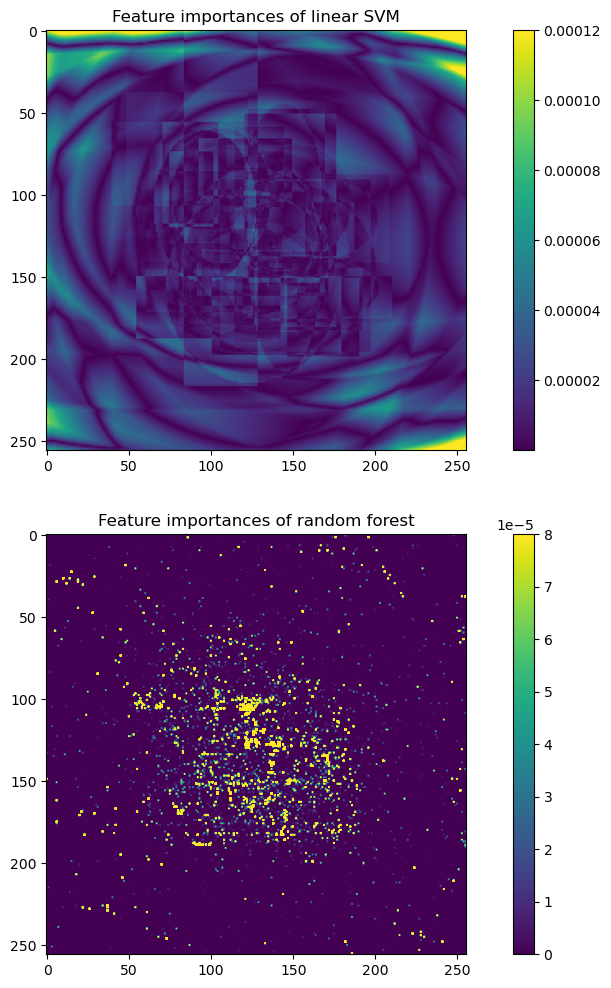

In [57]:
coef = np.abs(pipe_linear.named_steps['regressor'].coef_)
imp = pipe_rf.named_steps['regressor'].feature_importances_

pic_linear = coef.reshape(X_train.shape[1], -1)
pic_rf = imp.reshape(X_train.shape[1], -1)

plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
plt.imshow(pic_linear, vmax=0.00012)
plt.colorbar()
plt.title('Feature importances of linear SVM')

plt.subplot(2, 1, 2)
plt.imshow(pic_rf, vmax=0.00008)
plt.colorbar()
plt.title('Feature importances of random forest')

plt.show()

In [48]:
print('Linear SVM error:', mean_absolute_error(y_test, pipe_linear.predict(X_test)))
print('Random forest error:', mean_absolute_error(y_test, pipe_rf.predict(X_test)))

Linear SVM error: 0.08284991332416723
Random forest error: 0.04243586753323291


<font color='MediumOrchid'>**Вывод:**</font> на картинке важностей признаков линейной модели можно разглядеть очертания прямоугольных и эллиптических потенциалов, поэтому можно сказать, что данная картинка воссоздает структуру потенциалов тренировочной выборки, что не особо хорошо, поскольку модель подогналась именно под нее. Про важности признаков случайного леса сказать то же самое нельзя, ибо картинка имеет дискретизированную структуру и кардинально отличается от предыдущей. Тем не менее, случайный лес показал более высокое качество, чем линейная модель, что неудивительно, поскольку, исходя из картинкок, он имеет лучшую обобщающую способность.


---

Если всё сделано верно, то в предыдущем задании вы должны были увидеть некоторый сумбур в коэффициентах SVM. Можно увидеть, как некоторые потенциалы "отпечатались" в признаках, т.е. метод явно запомнил ответ, не пытаясь их обобщить. Видимо, нужно каким-то образом "стандартизировать" потенциалы, чтобы было легче "обобщать" их. К примеру, можно попробовать параллельно передвигать потенциал таким образом, чтобы в центре всегда оказывалось минимальное значение (места на матрице, не заполненные потенциалами, заполняются 20). Возможно вы заметите и другие "проблемы" или найдёте более элегантные решения, которые смогут помочь Вам улучшить результат.



**<font color='OrangeRed'>Внимание!</font> Следующее задание проверяться на кросс-проверке НЕ БУДЕТ! Это решение нужно будет загрузить в проверяющую систему в задание на ML-решение** Здесь вы можете просто поиграть с данными и решением, подобрать оптимальные параметры на кросс-валидации

## <font color='DarkOrange'>**Задание 6 (ML-решение, сдается в систему)**</font>
**Данные**: потенциалы  
**Метрика качества**: MAE  
**Цели**: в данном задании следует выполнить следующие пункты:  
1. Улучшить метод `PotentialTransformer`, чтобы "стандартизировать" данные (к примеру, переносить потенциалы в одно и то же место изображения)
2. Воспользоваться классом `Pipeline`, чтобы "объединить" трансформатор и обучаемый метод
3. Обучить лучшие деревья на Диком Западе (можно воспользоваться любой реализацией лесов из sklearn).
4. Загрузить решение в тестирующую систему

**<font color='OrangeRed'>Внимание!</font>** В этом задании разрешено пользоваться лишь любыми пройденными методами, **кроме методов**, являющихся или содержащих <font color='OrangeRed'>**градиентный бустинг**</font>, а также любых <font color='OrangeRed'>**нейросетевых методов**</font>! Вы можете попробовать как и простые решения, так и пройденные в этом семинаре методы ансамблирования. Например, со списком лесов, которые реализованы в пакете `sklearn.ensemble`, можно ознакомиться [тут](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble). По описанию метода убедитесь, что бустинг в нём не применяется.

**<font color='OrangeRed'>Внимание!</font>**  В задании на cv-gml.ru установлено ограничение по времени обучения в 10 минут. Поэтому, если вы будете перебирать параметры по сетке, то такой перебор может вполне занять несколько часов. Вы можете перебрать параметры в данном ноутбуке, а в качестве решения уже отправить финальный вариант с оптимальными найденными параметрами

**<font color='OrangeRed'>Внимание!</font>**  Если будете использовать леса, то  учтите, что время обучения леса зависит от способности леса построить оптимальное разбиение! Если ваше обучение проходит непозволительно долго, то, вероятно, лесам не удаётся подобрать хорошее оптимальное разбиение, а значит, вам нужно подумать об ином трансформаторе.

In [ ]:
# Your code here:

#<font color='MediumSeaGreen'> **Задание 7 [Bonus][0.5 балл]** </font>
Найдите мем про деревья решений/случайные леса лучше, чем этот:

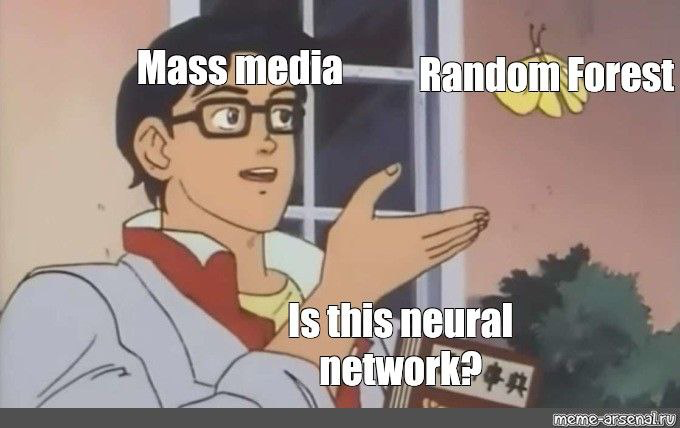

Важно: самый простой способ вставить картинку будет через Google Colab (даже если вы изначально делали не в нем). Нажмите на **"+ Text"**, в появившейся ячейке сделайте **прикрепление картинки** (как на скринах). Тогда ваша картинка "зашифруется" и будет корректно отображаться при конвертации в html

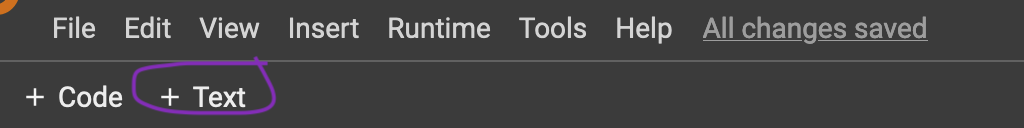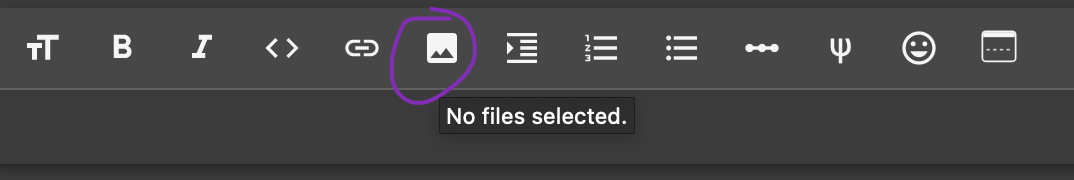

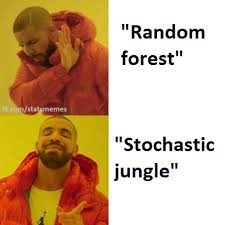

Ну что, детишки. Поздравляю с еще одним выполненным ДЗ!

